# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

# World Life Expectancy Prediction 

**Predictor Variable:**
* Life Expectancy 

**Input Features:**
* Year
* Adult Mortality
* Status
* Infat Mortality
* Alcohol Consumption
* Hepatitis B

**Model:** Linear Regression 

**Data source:** WHO and UN

# TASK #2: IMPORT DATASETS AND LIBRARIES

In [178]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [179]:
from jupyterthemes import jtplot
jtplot.style(theme = 'solarizedd', context = 'notebook', ticks = True, grid = False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 

In [180]:
# Read the csv file 
life_expectancy_df = pd.read_csv('life_expectancy_data.csv')

In [181]:
# View the dataframe
life_expectancy_df

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS AND VISUALIZATION

<AxesSubplot:>

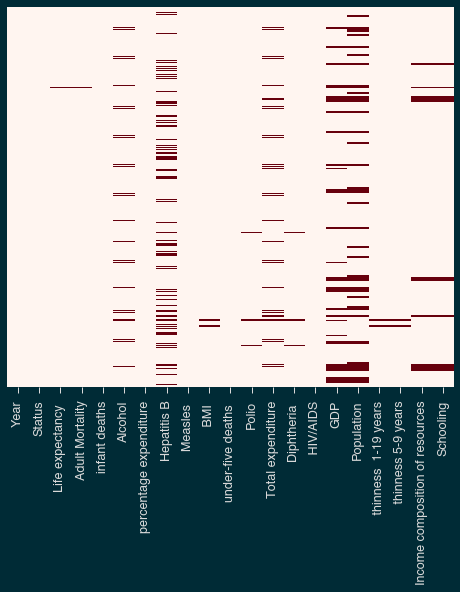

In [182]:
# Check if there are any Null values
sns.heatmap(life_expectancy_df.isnull(), yticklabels = False, cbar = False, cmap="Reds")

In [183]:
# Check the dataframe info
life_expectancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   object 
 2   Life expectancy                  2928 non-null   float64
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

In [184]:
# Statistical summary of the dataframe

life_expectancy_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


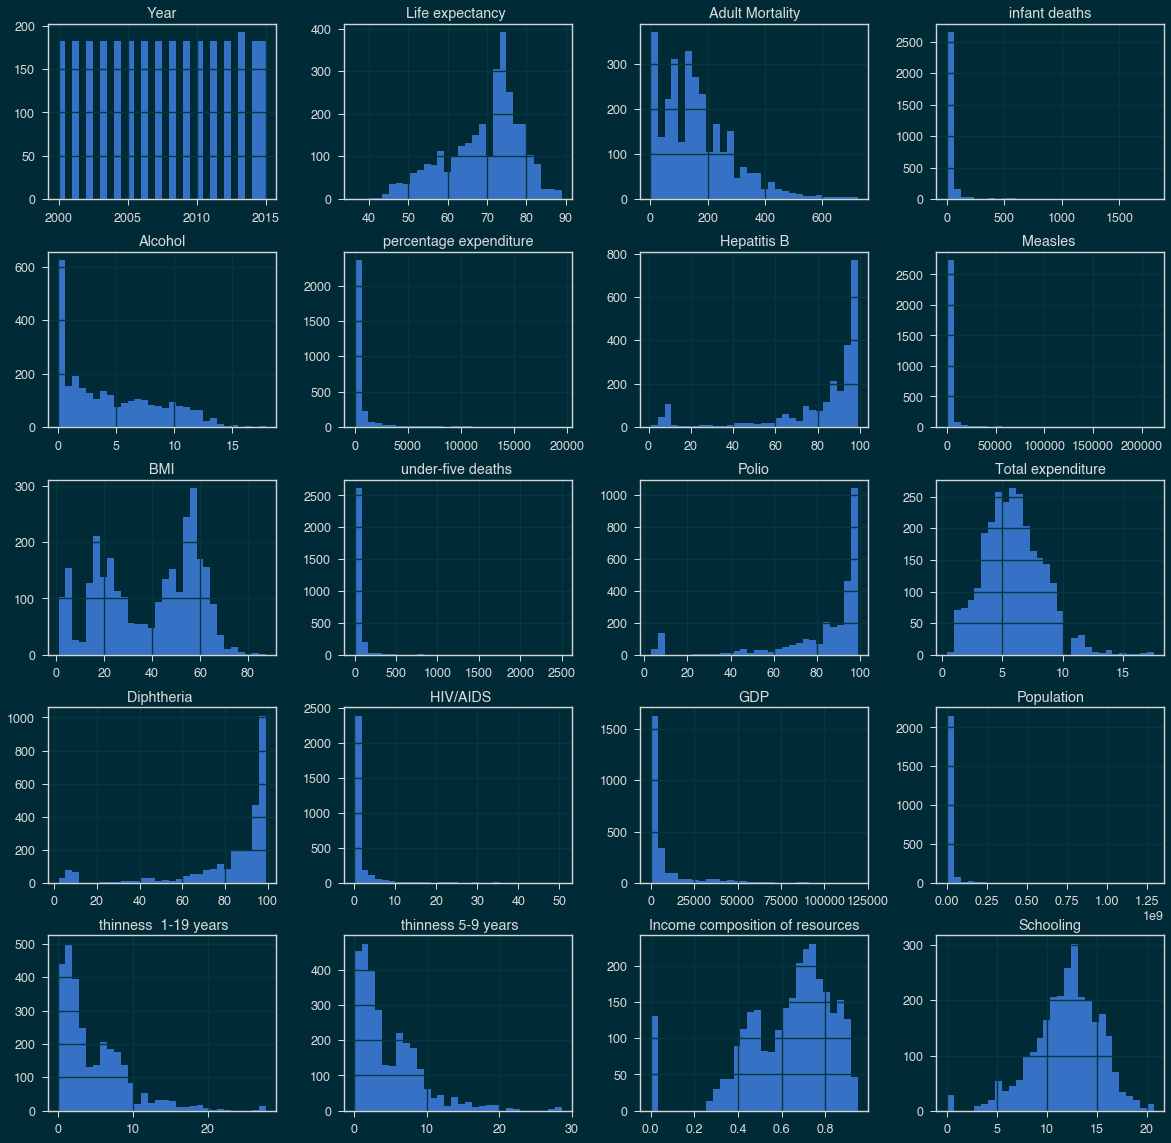

In [185]:
# Plot the histogram
life_expectancy_df.hist(bins = 30, figsize = (20, 20), color = 'b');


In [ ]:
# # Plot pairplot to see all columns plotted against each other 
plt.figure(figsize = (40,40))
sns.pairplot(life_expectancy_df)

<Figure size 2880x2880 with 0 Axes>

In [ ]:
sns.scatterplot(data = life_expectancy_df, x = 'Schooling', y = 'Life expectancy ')

In [ ]:
sns.scatterplot(data = life_expectancy_df, x = 'GDP', y = 'Life expectancy ')

In [ ]:
sns.scatterplot(data = life_expectancy_df, x = 'Income composition of resources', y = 'Life expectancy ')
# How productive resources are used

In [ ]:
sns.scatterplot(data = life_expectancy_df, x = ' HIV/AIDS', y = 'Life expectancy ')
# HIV/AIDs death rate increases, life expectancy is reduced

In [ ]:
sns.scatterplot(data = life_expectancy_df, x = 'Income composition of resources', y = 'Life expectancy ')
# How productive resources are used

In [ ]:
# Plot the correlation matrix

plt.figure(figsize = (20,20))
corr_matrix = life_expectancy_df.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [ ]:
# Checking the unique values in the Status column
life_expectancy_df['Status'].nunique()

In [ ]:
# Looking at potential categorical data selections: unique values in the 'Status' column. 
life_expectancy_df.Status.unique()

In [ ]:
# Create original Status column as one hot encoding eliminiates original 
# ToDo: is there an argument that stops this?
# life_expectancy_df['Status_orig'] = life_expectancy_df['Status']

In [ ]:
# Perform one-hot encoding
life_expectancy_df = pd.get_dummies(life_expectancy_df, columns = ['Status'], drop_first=False)

In [ ]:
life_expectancy_df[['Status_Developed', 'Status_Developing']].head()

In [ ]:
# Show developed countries
# life_expectancy_df[['Status_orig', 'Status_Developed', 'Status_Developing']]
# life_expectancy_df.loc[life_expectancy_df.Status_orig == 'Developed'][['Status_Developed', 'Status_Developing']]

### Let's deal with NULLs

In [ ]:
# Check the number of nulls in each column
print('Show all columns:')
print(' ')
print(life_expectancy_df.isnull().sum())
print('-'*70)
print('')
# Note the below code gets a list of column indexes where there are nulls
print('Show null-containing column indexs: ', np.where(life_expectancy_df.isnull().sum() != 0)[0])
print(' ')
print('-'*70)
print(' ')
print('---- Check the number of null values in the columns that have them ---')
print(' ')
# Put it all together: check the number of null values for the columns having null values
print(life_expectancy_df.isnull().sum()[np.where(life_expectancy_df.isnull().sum() != 0)[0]])


In [ ]:
life_expectancy_df.isnull().sum()[np.where(life_expectancy_df.isnull().sum() != 0)[0]]


In [ ]:
# Since all columns are now continous values we fill them with mean
life_expectancy_df = life_expectancy_df.apply(lambda x: x.fillna(x.mean()),axis=0)


In [ ]:
# Since we filled the nulls above with the average, we can check the nulls again...
# ...there are none
life_expectancy_df.isnull().sum()[np.where(life_expectancy_df.isnull().sum() != 0)[0]]
print(life_expectancy_df.isnull().sum())


In [ ]:
# Look at the maxium life expectancy 
life_expectancy_df['Life expectancy '].max()

In [ ]:
# Let's look at the dataframe's general stats again
life_expectancy_df.describe()

# TASK #4: CREATE TRAINING AND TESTING DATASET

In [ ]:
# Create train and test data
X = life_expectancy_df.drop(columns = ['Life expectancy '])
y = life_expectancy_df[['Life expectancy ']]


In [ ]:
# Look at the predictor variables
X

In [ ]:
# Look at the first 10 rows
y[:10]

In [ ]:
# Look at the shape
X.shape

In [ ]:
y.shape

In [ ]:
# Convert the data type to float32
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [ ]:
# Only take the numerical variables and scale them
X 

In [ ]:
# split the data into test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
# Scale the data 
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# TASK #5: TRAIN A LINEAR REGRESSION MODEL IN SCIKIT-LEARN

In [ ]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

# fit_intercept = False means intercept is 0. True means it starts where the 
# equation dictates
regresssion_model_sklearn = LinearRegression(fit_intercept = True)
regresssion_model_sklearn.fit(X_train, y_train)


In [ ]:
regresssion_model_sklearn_accuracy = regresssion_model_sklearn.score(X_test, y_test)
regresssion_model_sklearn_accuracy

In [ ]:
print('Linear Model Coefficient (m): ', regresssion_model_sklearn.coef_)
print('Linear Model Coefficient (b): ', regresssion_model_sklearn.intercept_)

# TASK #6: EVALUATE TRAINED MODEL PERFORMANCE 

In [ ]:
# Make prediction
y_predict = regresssion_model_sklearn.predict(X_test)

In [ ]:
y_predict[:10]

In [ ]:
# Plot the scaled result
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [ ]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)


In [ ]:
# Plot the original values
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [ ]:
# Plot the KPIs

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 
